         Date  Confirmed
0     1/25/20          0
1     1/26/20          0
2     1/27/20          1
3     1/28/20          1
4     1/29/20          1
..        ...        ...
276  10/27/20       8870
277  10/28/20       9205
278  10/29/20       9791
279  10/30/20      10424
280  10/31/20      10663

[281 rows x 2 columns]


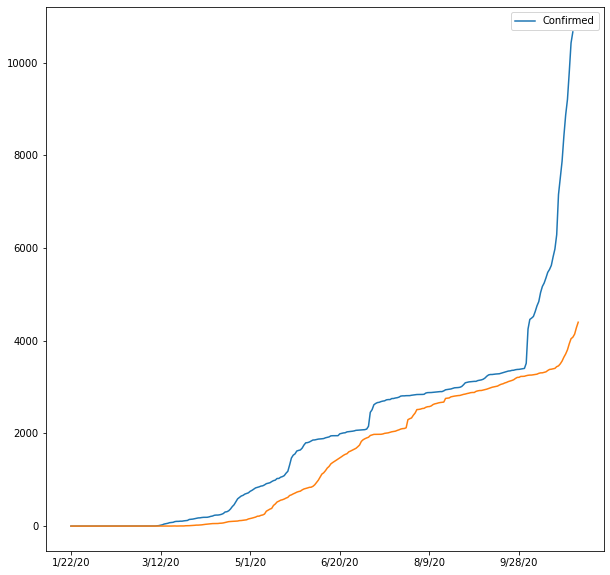

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

CONFIRMED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/10-28-2020.csv'
df = pd.read_csv(CONFIRMED_URL)

class Corona:


    def __init__(self):

        BASE_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series'

        self.URLS = {'confirmed': f'{BASE_URL}/time_series_covid19_confirmed_global.csv',
                'deaths': f'{BASE_URL}/time_series_covid19_deaths_global.csv',
                'recovered':f'{BASE_URL}/time_series_covid19_recovered_global.csv', 
        }


        self.data = {case:pd.read_csv(url) for case, url in self.URLS.items()}
    def current_status(self):
        pass 

corona = Corona()

confirmed_df = corona.data['confirmed']
confirmed_df.to_csv('confirmed.csv', index=False)
confirmed_df.drop(["Lat","Long"],axis = 1)
confirmed_df_new = (confirmed_df.drop(["Lat","Long","Country/Region"],axis = 1)).iloc[:,4:]
confirmed_df_LK = confirmed_df_new.iloc[229]
confirmed_df_LK = pd.DataFrame(confirmed_df_LK).reset_index()
confirmed_df_LK.columns = ['Date', 'Confirmed']
print(confirmed_df_LK)

deaths_df = corona.data['deaths']
deaths_df.to_csv('deaths.csv', index=False)
deaths_df_new = (deaths_df.drop(["Lat","Long","Country/Region"],axis = 1)).iloc[:,1:]
deaths_df_LK = deaths_df_new.iloc[229]
deaths_df_LK = deaths_df_LK.astype(float)

recovered_df = corona.data['recovered']
recovered_df.to_csv('recovered.csv', index=False)
recovered_df_new = (recovered_df.drop(["Lat","Long","Country/Region"],axis = 1)).iloc[:,1:]
recovered_df_LK = recovered_df_new.iloc[216]
recovered_df_LK = recovered_df_LK.astype(float)



confirmed_df_LK.plot(figsize=(10,10),label="confirmed")
recovered_df_LK.plot(figsize=(10,10),label="recovered")
#deaths_df_LK.plot(figsize=(20,20),y="10/30/20")
plt.show()

In [ ]:
df = pd.DataFrame(confirmed_df_LK)
df

,Date,Confirmed
0,1/25/20,0
1,1/26/20,0
2,1/27/20,1
3,1/28/20,1
4,1/29/20,1
...,...,...
276,10/27/20,8870
277,10/28/20,9205
278,10/29/20,9791
279,10/30/20,10424


In [ ]:
def input_serving_fn(dataframe):
  data = []
  for i in range(2, dataframe.shape[0]):
    #print(dataframe.iloc[i][1])
    data.append((dataframe.iloc[i][1]-dataframe.iloc[i-2][1])/(2*dataframe.iloc[i][1]))
  return data ;

In [ ]:
lambda_ti = input_serving_fn(df)
lambda_ti

[0.5,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.25,
 0.25,
 0.3333333333333333,
 0.4,
 0.3333333333333333,
 0.32142857142857145,
 0.29545454545454547,
 0.22549019607843138,
 0.13333333333333333,
 0.1506849315068493,
 0.11038961038961038,
 0.054878048780487805,
 0.10309278350515463,
 0.09803921568627451,
 0.024509803921568627,
 0.018867924528301886,
 0.018867924528301886,
 0.030973451327433628,
 0.04700854700854701,
 0.036885245901639344,
 0.09090909090909091,
 0.0821917808219178,
 0.026490066225165563,
 0.040880503144654086,
 0.045180722891566265,
 0.048295454545454544,
 0.033707865168539325,
 0.024324324324324326,
 0.0291005291005291,
 0.013157894736842105,
 0.002631578947368421,
 0.020202020202020204,
 0.047619047619047616,
 0.04377880184331797,
 0.04935622317596566,
 

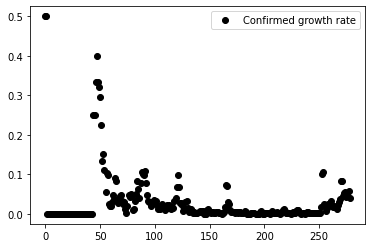

In [ ]:
plt.figure()
plt.plot(lambda_ti, 'ko', label="Confirmed growth rate")
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in multiply
  after removing the cwd from sys.path.


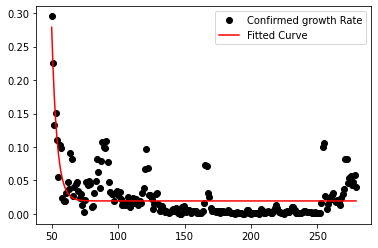

In [ ]:
from scipy.optimize import curve_fit

def func(x, a, b, c, d):
  return a * np.exp(-b * (x-d)) + c

Start =50
final_date= len(lambda_ti)
x = np.linspace(Start,final_date,final_date-Start)   # changed boundary conditions to avoid division by 0
y = lambda_ti[Start:]
#print(x)
#print(y)
popt, pcov = curve_fit(func, x, y,p0=[1,1,1,Start])

[a,b,c,d]=popt
plt.figure()
plt.plot(x, y, 'ko', label="Confirmed growth Rate")
plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()


In [ ]:
#prediction of the infected next day
growth_rate_nxt_day=func(final_date+1,a,b,c,d)
print(growth_rate_nxt_day)

0.019392347014844925
